# GeoPandas 1
<img src="http://geopandas.org/_images/sphx_glr_plotting_basemap_background_002.png" width=300>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Geometry-types" data-toc-modified-id="Geometry-types-1">Geometry types</a></span><ul class="toc-item"><li><span><a href="#Gotchas" data-toc-modified-id="Gotchas-1.1">Gotchas</a></span></li><li><span><a href="#Constructing-GeoSeries-from-Shapely-Points" data-toc-modified-id="Constructing-GeoSeries-from-Shapely-Points-1.2">Constructing <code>GeoSeries</code> from Shapely <code>Point</code>s</a></span><ul class="toc-item"><li><span><a href="#Plot-the-geometries" data-toc-modified-id="Plot-the-geometries-1.2.1">Plot the geometries</a></span></li></ul></li></ul></li><li><span><a href="#Constructing-GeoSeries-from-a-Pandas-DataFrame" data-toc-modified-id="Constructing-GeoSeries-from-a-Pandas-DataFrame-2">Constructing <code>GeoSeries</code> from a Pandas <code>DataFrame</code></a></span><ul class="toc-item"><li><span><a href="#Reading-a-SHP-file" data-toc-modified-id="Reading-a-SHP-file-2.1">Reading a SHP file</a></span></li><li><span><a href="#Data-exploration-using-pandas" data-toc-modified-id="Data-exploration-using-pandas-2.2">Data exploration using pandas</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-2.3">Plotting</a></span><ul class="toc-item"><li><span><a href="#Overlay-USA-map" data-toc-modified-id="Overlay-USA-map-2.3.1">Overlay USA map</a></span></li></ul></li><li><span><a href="#Reprojection" data-toc-modified-id="Reprojection-2.4">Reprojection</a></span></li><li><span><a href="#Overlay-plot" data-toc-modified-id="Overlay-plot-2.5">Overlay plot</a></span></li></ul></li><li><span><a href="#Filtering-and-writing-data" data-toc-modified-id="Filtering-and-writing-data-3">Filtering and writing data</a></span><ul class="toc-item"><li><span><a href="#Read-from-Shape-file" data-toc-modified-id="Read-from-Shape-file-3.1">Read from Shape file</a></span></li><li><span><a href="#Plot-a-map-by-category" data-toc-modified-id="Plot-a-map-by-category-3.2">Plot a map by category</a></span></li><li><span><a href="#Groupby-a-column" data-toc-modified-id="Groupby-a-column-3.3">Groupby a column</a></span></li><li><span><a href="#Split-by-column-value-and-write-to-disk" data-toc-modified-id="Split-by-column-value-and-write-to-disk-3.4">Split by column value and write to disk</a></span></li></ul></li><li><span><a href="#Dissolve-polygons" data-toc-modified-id="Dissolve-polygons-4">Dissolve polygons</a></span><ul class="toc-item"><li><span><a href="#Make-a-choropleth-map" data-toc-modified-id="Make-a-choropleth-map-4.1">Make a choropleth map</a></span><ul class="toc-item"><li><span><a href="#Export-to-disk" data-toc-modified-id="Export-to-disk-4.1.1">Export to disk</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh') # better for plotting geometries vs general plots.

from shapely.geometry import Point, Polygon, LineString
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

## Geometry types
Geopandas uses `shapely.geometry` geometry objects. Geopandas has `6` types of geometry objects 
 - Point
 - Line (LineString)
 - Polygon
 - Multi-Point
 - Multi-Line
 - Multi-Polygon
 
### Gotchas
 - Geopandas is a growing project and its API could change over time
 - Geopandas does not restrict or check for consistency in geometry type of its series.

### Constructing `GeoSeries` from Shapely `Point`s

In [2]:
point_list = [Point(-120,45), Point(-121.2, 46), Point(-122.9, 47.5)]
gs = GeoSeries(point_list)
gs

0        POINT (-120 45)
1      POINT (-121.2 46)
2    POINT (-122.9 47.5)
dtype: object

In [3]:
type(gs)

geopandas.geoseries.GeoSeries

In [4]:
gs.geometry

0        POINT (-120 45)
1      POINT (-121.2 46)
2    POINT (-122.9 47.5)
dtype: object

In [5]:
gs.geom_type

0    Point
1    Point
2    Point
dtype: object

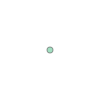

In [6]:
gs.iloc[0]

In [8]:
gs.crs = {'init':'epsg:4326'}

#### Plot the geometries 
This internally uses `descartes` and `matplotlib`

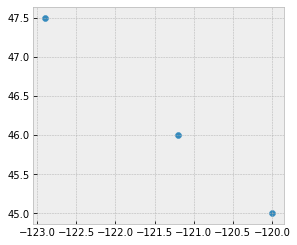

In [9]:
gs.plot()

## Constructing `GeoSeries` from a Pandas `DataFrame`

In [16]:
data_dict = {'name':['a','b','c'],
            'lat':[45,46,47.5],
            'lon':[-120,-121.2,-123]}

df = pd.DataFrame(data_dict)
df.set_index(df['name'], inplace=True)
df

,lat,lon,name
name,,,
a,45.0,-120.0,a
b,46.0,-121.2,b
c,47.5,-123.0,c


In [17]:
[xy for xy in zip(df['lon'], df['lat'])]

[(-120.0, 45.0), (-121.2, 46.0), (-123.0, 47.5)]

In [18]:
point_list = [Point(xy) for xy in zip(df['lon'], df['lat'])]
point_list

In [20]:
gdf = GeoDataFrame(df, geometry=point_list)
gdf

,lat,lon,name,geometry
name,,,,
a,45.0,-120.0,a,POINT (-120 45)
b,46.0,-121.2,b,POINT (-121.2 46)
c,47.5,-123.0,c,POINT (-123 47.5)


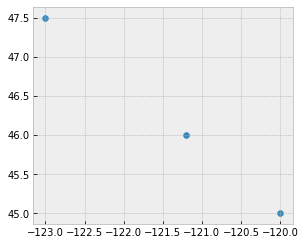

In [21]:
gdf.plot()

### Reading a SHP file

In [22]:
fire_stations = gpd.read_file('./data/FireStations.shp')
type(fire_stations)

geopandas.geodataframe.GeoDataFrame

In [23]:
fire_stations.head()

,OBJECTID,post_id,Name,descriptio,cat1,cat2,cat3,addrln1,addrln2,city,...,source,ext_id,use_type,dis_status,latitude,longitude,date_updat,POINT_X,POINT_Y,geometry
0,40223266,2022.0,Los Angeles County Fire Department - Battalion...,The Battalion provides fire and rescue service...,Public Safety,Fire Stations,None,7643 W. Santa Monica Blvd.,None,Los Angeles,...,211,None,publish,None,34.090940,-118.356388,2013-06-01,6.453766e+06,1.855666e+06,POINT (6453766.230470523 1855666.492027521)
1,40223440,2236.0,Los Angeles County Fire Department - Battalion...,The Battalion provides fire and rescue service...,Public Safety,Fire Stations,Battalion HQ,6031 Rickenbacker Rd.,None,Commerce,...,211,None,publish,None,33.988587,-118.154162,2013-06-01,6.514937e+06,1.818263e+06,POINT (6514937.276763365 1818262.767294437)
2,40223442,2237.0,Los Angeles County Fire Department - Battalion...,The Battalion provides fire and rescue service...,Public Safety,Fire Stations,None,1059 N. White Ave.,None,Pomona,...,211,None,publish,None,34.067555,-117.759366,2013-06-01,6.634548e+06,1.847052e+06,POINT (6634547.880061358 1847052.198560596)
3,40223459,2262.0,Los Angeles County Fire Department - Battalion...,The Battalion provides fire and rescue service...,Public Safety,Fire Stations,None,1260 Encinal Canyon Rd,None,Malibu,...,211,None,publish,None,34.084350,-118.866037,2013-06-01,6.299441e+06,1.854207e+06,POINT (6299441.115893021 1854206.637991846)
4,40223463,2269.0,Los Angeles County Fire Department - Battalion...,The Battalion provides fire and rescue service...,Public Safety,Fire Stations,Battalion HQ,6301 S. Santa Fe Ave.,None,Huntington Park,...,211,None,publish,None,33.983196,-118.230626,2013-06-01,6.491753e+06,1.816345e+06,POINT (6491753.321819022 1816345.240289599)


In [24]:
fire_stations.crs

{'proj': 'lcc',
 'lat_1': 34.03333333333333,
 'lat_2': 35.46666666666667,
 'lat_0': 33.5,
 'lon_0': -118,
 'x_0': 2000000,
 'y_0': 500000.0000000001,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

### Data exploration using pandas

In [28]:
fire_stations.columns

Index(['OBJECTID', 'post_id', 'Name', 'descriptio', 'cat1', 'cat2', 'cat3',
       'addrln1', 'addrln2', 'city', 'state', 'zip', 'hours', 'phones', 'url',
       'email', 'info1', 'info2', 'link', 'org_name', 'source', 'ext_id',
       'use_type', 'dis_status', 'latitude', 'longitude', 'date_updat',
       'POINT_X', 'POINT_Y', 'geometry'],
      dtype='object')

In [67]:
fire_stations['city'].value_counts().head()

Los Angeles      65
Long Beach       25
Santa Clarita    10
Pasadena         10
Pomona            9
Name: city, dtype: int64

### Plotting

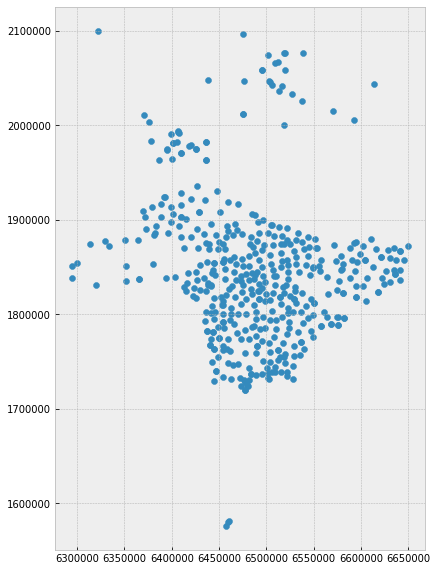

In [39]:
fire_stations.plot(figsize=(10,10))

#### Overlay USA map
Read the bundled dataset and overlay it on top of this

In [41]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [42]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [45]:
world.shape

(177, 6)

In [46]:
world['name'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Antarctica', 'Fr. S. Antarctic Lands',
       'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium',
       'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahamas',
       'Bosnia and Herz.', 'Belarus', 'Belize', 'Bolivia', 'Brazil',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Rep.', 'Canada',
       'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Dem. Rep. Congo', 'Congo', 'Colombia', 'Costa Rica', 'Cuba',
       'N. Cyprus', 'Cyprus', 'Czech Rep.', 'Germany', 'Djibouti',
       'Denmark', 'Dominican Rep.', 'Algeria', 'Ecuador', 'Egypt',
       'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji',
       'Falkland Is.', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Eq. Guinea',
       'Greece', 'Greenland', 'Guatemala', 'Guyana', 'Honduras',
       'Croatia', 'Haiti', 'Hungary', 'I

In [47]:
usa = world[world['name']=='United States']
usa

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
168,313973000.0,North America,United States,USA,15094000.0,"(POLYGON ((-155.54211 19.08348000000001, -155...."


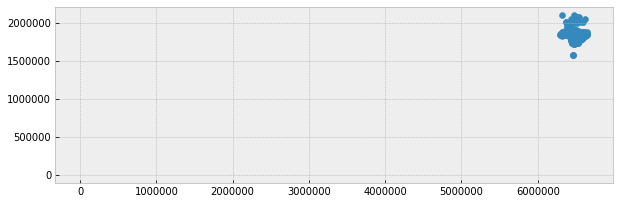

In [49]:
ax = fire_stations.plot(figsize=(10,10))
usa.plot(ax = ax)

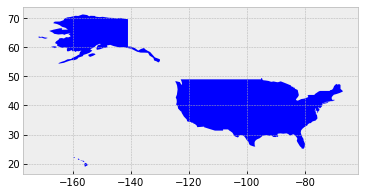

In [50]:
usa.plot()

In [51]:
usa.crs

{'init': 'epsg:4326'}

Snap! They are in different projections and geopandas does not handle that. SO lets try to reproject the fire stations to match usa

### Reprojection
Projecting the fire stations layer to match the world dataset from geopandas

In [52]:
fire_stations_gcs = fire_stations.to_crs(epsg=4326)

In [53]:
fire_stations_gcs.crs

{'init': 'epsg:4326', 'no_defs': True}

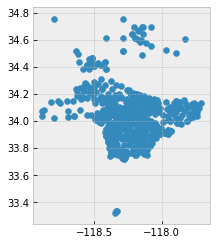

In [54]:
fire_stations_gcs.plot()

In [60]:
fire_stations_gcs.total_bounds

array([-118.88357856,   33.32376846, -117.70773665,   34.75793147])

### Overlay plot

(33, 35)

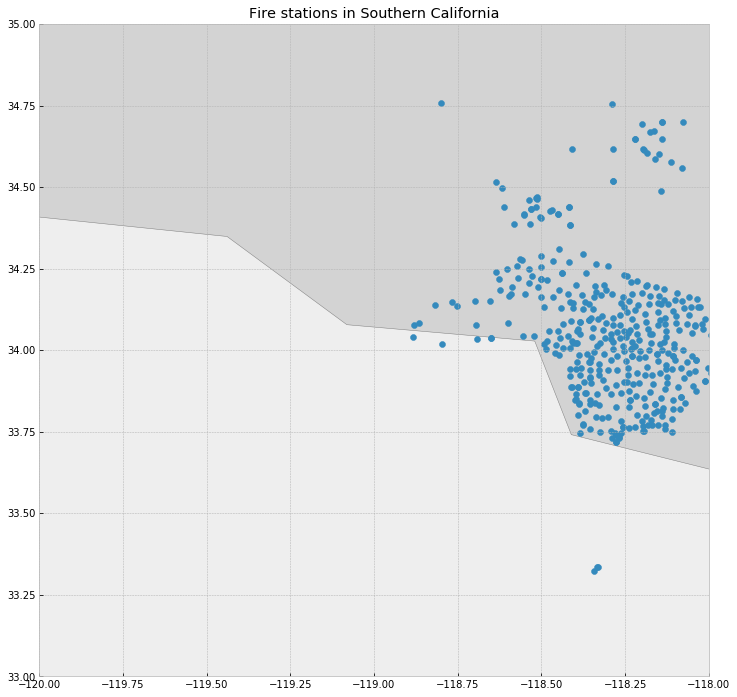

In [66]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title('Fire stations in Southern California')
usa.plot(ax=ax, facecolor='lightgray', edgecolor='gray')
fire_stations_gcs.plot(ax=ax)

#this plots the whole US. To limit the scale to just SoCal, limit the axes
ax.set_xlim([-120, -118])
ax.set_ylim([33, 35])

## Filtering and writing data
In this part, we will read the `Damselfish` shape file, do some filtering, column calculations and split the shape file into many smaller ones grouped by a column.

### Read from Shape file

In [2]:
damsel_gdf = gpd.read_file('./data/damselfish/DAMSELFISH_distributions.shp')
damsel_gdf.head(3)

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,POLYGON ((-115.6437454219999 29.71392059300007...
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.589950704 21.89339825500002, -1..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.159618439 19.01535626700007, -1..."


In [3]:
damsel_gdf.columns

Index(['ID_NO', 'BINOMIAL', 'ORIGIN', 'COMPILER', 'YEAR', 'CITATION', 'SOURCE',
       'DIST_COMM', 'ISLAND', 'SUBSPECIES', 'SUBPOP', 'LEGEND', 'SEASONAL',
       'TAX_COMM', 'RL_UPDATE', 'KINGDOM_NA', 'PHYLUM_NAM', 'CLASS_NAME',
       'ORDER_NAME', 'FAMILY_NAM', 'GENUS_NAME', 'SPECIES_NA', 'CATEGORY',
       'geometry'],
      dtype='object')

In [4]:
damsel_gdf.shape

(231, 24)

### Plot a map by category

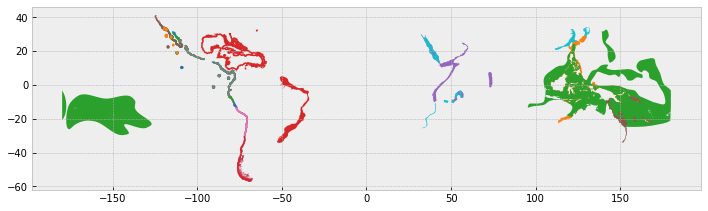

In [17]:
damsel_gdf.plot(column='BINOMIAL', categorical=True, 
                figsize=(12, 4))

### Groupby a column
The `BINOMIAL` column contains the full `genus` and `species` names of the fishes. We could split the shape file by each fish type

In [5]:
damsel_gdf['BINOMIAL'].value_counts()

Amphiprion sandaracinos    51
Chromis cyanea             15
Chromis alpha              14
Chromis alta               11
Microspathodon bairdii     10
Abudefduf troschelii       10
Stegastes acapulcoensis     9
Chromis atrilobata          9
Microspathodon dorsalis     9
Stegastes arcifrons         8
Stegastes flavilatus        8
Stegastes beebei            8
Chromis limbaughi           7
Teixeirichthys jordani      7
Nexilosus latifrons         7
Abudefduf concolor          6
Chrysiptera flavipinnis     5
Azurina hirundo             5
Hypsypops rubicundus        4
Chromis pembae              4
Stegastes leucorus          3
Chromis intercrusma         3
Abudefduf declivifrons      3
Stegastes rectifraenum      3
Azurina eupalama            3
Chromis crusma              3
Chromis flavicauda          2
Stegastes redemptus         2
Stegastes baldwini          1
Chromis punctipinnis        1
Name: BINOMIAL, dtype: int64

In [6]:
grouped = damsel_gdf.groupby(by='BINOMIAL')
grouped.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,POLYGON ((-115.6437454219999 29.71392059300007...
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.589950704 21.89339825500002, -1..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.159618439 19.01535626700007, -1..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-80.86500229899997 -0.77894492099994...
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-67.33922225599997 -55.6761029239999...
5,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-74.81822204599996 -51.4608230589999...
6,183462.0,Stegastes beebei,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,beebei,VU,POLYGON ((-86.13105102199995 5.598867493000057...
7,183462.0,Stegastes beebei,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,beebei,VU,POLYGON ((-80.68215272899994 4.037426486000072...
8,183462.0,Stegastes beebei,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,beebei,VU,POLYGON ((-90.22271068899994 -0.27334342499995...
9,183462.0,Stegastes beebei,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,beebei,VU,POLYGON ((-83.93571481699996 9.296388679000074...


In [9]:
type(grouped), type(grouped['BINOMIAL'])

(pandas.core.groupby.DataFrameGroupBy, pandas.core.groupby.SeriesGroupBy)

### Split by column value and write to disk
Create output folder is not available

In [10]:
!mkdir './data/fish_split'

We can iterate over the `DataFrameGroupBy` object and perform aggregations like `std`, `mean`, `sum` etc. However, here, we can split by column and write each individual fish species to its own shape file.

In [12]:
import os
for key, value in grouped:
    # create output name using key. Replace space with _
    out_name = '{}.shp'.format(key.replace(" ","_"))
    print("Writing: " + out_name)
    
    #write to disk using geopandas
    value.to_file(os.path.join("./data/fish_split", out_name))

Writing: Abudefduf_concolor.shp
Writing: Abudefduf_declivifrons.shp
Writing: Abudefduf_troschelii.shp
Writing: Amphiprion_sandaracinos.shp
Writing: Azurina_eupalama.shp
Writing: Azurina_hirundo.shp
Writing: Chromis_alpha.shp
Writing: Chromis_alta.shp
Writing: Chromis_atrilobata.shp
Writing: Chromis_crusma.shp
Writing: Chromis_cyanea.shp
Writing: Chromis_flavicauda.shp
Writing: Chromis_intercrusma.shp
Writing: Chromis_limbaughi.shp
Writing: Chromis_pembae.shp
Writing: Chromis_punctipinnis.shp
Writing: Chrysiptera_flavipinnis.shp
Writing: Hypsypops_rubicundus.shp
Writing: Microspathodon_bairdii.shp
Writing: Microspathodon_dorsalis.shp
Writing: Nexilosus_latifrons.shp
Writing: Stegastes_acapulcoensis.shp
Writing: Stegastes_arcifrons.shp
Writing: Stegastes_baldwini.shp
Writing: Stegastes_beebei.shp
Writing: Stegastes_flavilatus.shp
Writing: Stegastes_leucorus.shp
Writing: Stegastes_rectifraenum.shp
Writing: Stegastes_redemptus.shp
Writing: Teixeirichthys_jordani.shp


Plot the last fish to see if its a smaller area than original:

Teixeirichthys jordani


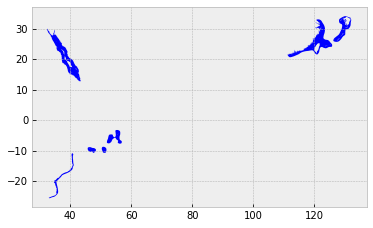

In [14]:
print(key)
value.plot()

## Dissolve polygons
An option is to dissolve each of the individual polygons into one for each fish. This way we can measure the area of each species. This is a proper `geoprocessing` implemented from `Shapely` lib.

In [ ]:
grouped.aggregate()

In [18]:
damsel_gdf_dissolved = damsel_gdf.dissolve(by='BINOMIAL', aggfunc='first')
damsel_gdf_dissolved.shape

(30, 23)

This took a while, but we managed to shrink `231` features to `30` features. Let us plot and write it to disk for future processing.

In [20]:
damsel_gdf_dissolved.head(3)

,geometry,ID_NO,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,TAX_COMM,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY
BINOMIAL,,,,,,,,,,,,,,,,,,,,,
Abudefduf concolor,(POLYGON ((-86.13105102199995 5.59886749300005...,183483.0,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,NaN,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Abudefduf,concolor,LC
Abudefduf declivifrons,(POLYGON ((-90.09187344499998 13.7248151750000...,183460.0,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,NaN,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Abudefduf,declivifrons,LC
Abudefduf troschelii,(POLYGON ((-91.24864959699994 -0.6798474789999...,183397.0,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,NaN,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Abudefduf,troschelii,LC


### Make a choropleth map
Since the dataframe is reshaped by applying the categorical column as the index, I just create a simple `choropleth` map. Simply specify a `cmap` and that does the trick

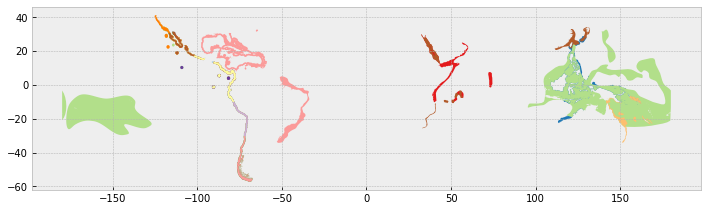

In [24]:
damsel_gdf_dissolved.plot(cmap='Paired', figsize=(12,4))

#### Export to disk

In [25]:
damsel_gdf_dissolved.to_file('./data/damselfish/damselfish_dissolved.shp')